### Objective 

In order to add a value which represents vegetation type we previously merged the World Database of Protected Areas maps with vegetation maps produced with CPTEC-PVM2 for scenarios present, RCP4.5 and RCP8.5, using QGIS

In [1]:
import geopandas as gpd
import fiona
import shapely

### Import Shapefile data

In [2]:
df=gpd.read_file("intersect_ens.shp")

In [3]:
df.head(4)

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,presntVG,ENS45,ENS85_1000,ENS85_420,geometry
0,555555848.0,555555848,1,Musichi,Musichi,Distritos Regionales De Manejo Integrado,Integrated Management Regional District,National,VI,Not Applicable,...,State Verified,1861,CO-LAG,COL,COL,8,11,11,11,POLYGON ((-72.50846954199994 11.77778540000008...
1,309.0,309,1,Cerro Santa Ana,Cerro Santa Ana,Natural Monument,Natural Monument,National,III,Not Applicable,...,State Verified,285,VE-I,VEN,VEN,8,11,11,11,POLYGON ((-69.90081999999995 11.80974000000009...
2,2246.0,2246,1,Medanos de Coro,MÃ©danos de Coro,National Park,National Park,National,II,Not Applicable,...,State Verified,285,VE-I,VEN,VEN,8,11,11,11,"(POLYGON ((-69.46572575413612 11.3, -69.653754..."
3,30673.0,30673,1,Laguna de Boca de CaÃ±o,Laguna de Boca de CaÃ±o,Wildlife Refuge,Wildlife Refuge,National,IV,Not Applicable,...,State Verified,285,VE-I,VEN,VEN,8,11,11,11,POLYGON ((-69.82605999999993 11.90686000000005...


In [4]:
df[df.ISO3.str.contains('BRA')]

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,presntVG,ENS45,ENS85_1000,ENS85_420,geometry
472,34075.0,34075,1,Raposa Serra do Sol,Raposa Serra do Sol,Terra IndÃ­gena,Indigenous Area,National,Not Reported,Not Applicable,...,State Verified,905,BR-RR,BRA,BRA,1,6,6,6,"(POLYGON ((-59.9 4.476280527212682, -59.9 4.10..."
473,19762.0,19762,1,Parque Nacional Do Monte Roraima,Parque Nacional Do Monte Roraima,Parque,Park,National,II,Not Applicable,...,State Verified,1802,BR-RR,BRA,BRA,1,6,6,6,POLYGON ((-60.09999999999999 5.131078411433412...
478,34065.0,34065,1,Manoa/Pium,Manoa/Pium,Terra IndÃ­gena,Indigenous Area,National,Not Reported,Not Applicable,...,State Verified,905,BR-RR,BRA,BRA,6,6,6,6,POLYGON ((-60.17580876701809 2.900000000000002...
479,34058.0,34058,1,Jabuti,Jabuti,Terra IndÃ­gena,Indigenous Area,National,Not Reported,Not Applicable,...,State Verified,905,BR-RR,BRA,BRA,13,6,6,6,"POLYGON ((-60.3 3.241435346674273, -60.3 3.187..."
480,352264.0,352264,1,SÃ£o Marcos - RR,SÃ£o Marcos - RR,Terra IndÃ­gena,Indigenous Area,National,Not Reported,Not Applicable,...,State Verified,905,BR-RR,BRA,BRA,13,6,6,6,POLYGON ((-60.58286548881978 3.300000000000001...
481,34080.0,34080,1,Serra da MoÃ§a,Serra da MoÃ§a,Terra IndÃ­gena,Indigenous Area,National,Not Reported,Not Applicable,...,State Verified,905,BR-RR,BRA,BRA,13,6,6,6,POLYGON ((-60.70292644209706 3.300000000000001...
482,34081.0,34081,1,Sucuba,Sucuba,Terra IndÃ­gena,Indigenous Area,National,Not Reported,Not Applicable,...,State Verified,905,BR-RR,BRA,BRA,13,6,6,6,POLYGON ((-61.09999999999999 2.921212232008434...
483,34063.0,34063,1,Malacacheta,Malacacheta,Terra IndÃ­gena,Indigenous Area,National,Not Reported,Not Applicable,...,State Verified,905,BR-RR,BRA,BRA,13,6,6,6,POLYGON ((-60.51096489299994 2.540825013000074...
484,34063.0,34063,1,Malacacheta,Malacacheta,Terra IndÃ­gena,Indigenous Area,National,Not Reported,Not Applicable,...,State Verified,905,BR-RR,BRA,BRA,6,6,6,6,"POLYGON ((-60.44015848404081 2.5, -60.49118539..."
485,34063.0,34063,1,Malacacheta,Malacacheta,Terra IndÃ­gena,Indigenous Area,National,Not Reported,Not Applicable,...,State Verified,905,BR-RR,BRA,BRA,6,6,6,8,"POLYGON ((-60.5 2.699999999999999, -60.5203445..."


Raw data - too many information - too many columns... 

![](capturar.png)

### Creating GeoDataFrame with columns of interest 

I am interested in distribution of vegetation types over states of SA

In [5]:
vegtype=gpd.GeoDataFrame(df, columns =['NAME','ISO3', 'ENS45', 'ENS85_1000','ENS85_420','presntVG','geometry', 'REP_AREA' ])

In [6]:
vegtype.head(10)

,NAME,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA
0,Musichi,COL,11,11,11,8,POLYGON ((-72.50846954199994 11.77778540000008...,14.944
1,Cerro Santa Ana,VEN,11,11,11,8,POLYGON ((-69.90081999999995 11.80974000000009...,19.000
2,Medanos de Coro,VEN,11,11,11,8,"(POLYGON ((-69.46572575413612 11.3, -69.653754...",912.800
3,Laguna de Boca de CaÃ±o,VEN,11,11,11,8,POLYGON ((-69.82605999999993 11.90686000000005...,4.530
4,Bahia Portete Kaurrele,COL,13,6,6,8,POLYGON ((-71.89999999999999 12.28410604249185...,140.800
5,Macuira,COL,13,6,6,8,"POLYGON ((-71.36152724672695 12.1, -71.3 12.1,...",250.000
6,Medanos de Coro,VEN,6,6,6,8,POLYGON ((-69.90000000000001 11.63958309954254...,912.800
7,Medanos de Coro,VEN,13,6,6,8,"POLYGON ((-69.75051562028544 11.7, -69.6999999...",912.800
8,Bahia Portete Kaurrele,COL,6,6,8,8,POLYGON ((-71.89999999999999 12.18779408916287...,140.800
9,Macuira,COL,6,6,8,9,"POLYGON ((-71.3 12.17667507039294, -71.3 12.1,...",250.000


Values in columns **'ENS45',  'ENS85_1000',  'ENS85_420',  'presntVG'** represent 13 vegetation types (**1-13**)

### Calculate area for all polygons

Some protected areas are divided(example below) and that is why can NOT use REP_AREA from raw data and we need to calculate area again!

In [63]:
BRA.loc[BRA['NAME'] == 'Deni'] 

,NAME,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA,area
914,Deni,BRA,13,1,13,1,"(POLYGON ((-68.10386923444703 -6.5, -68.099999...",15313.03499,0.050414
915,Deni,BRA,13,13,6,1,"(POLYGON ((-66.87112323658241 -6.5, -66.870806...",15313.03499,0.000929
916,Deni,BRA,13,6,6,1,(POLYGON ((-66.41812607033641 -6.6999999999999...,15313.03499,0.609249
917,Deni,BRA,13,1,6,1,POLYGON ((-68.66275613732654 -7.10000000000000...,15313.03499,0.568691
4059,Deni,BRA,6,6,6,1,(POLYGON ((-66.99918332115755 -7.1000000000000...,15313.03499,0.020766


In [7]:
selection = vegtype[0:10]

In [8]:
for index, row in selection.iterrows():
   ...:     poly_area = row['geometry'].area


In [9]:
vegtype['area'] = vegtype.area

In [10]:
vegtype['area'].head()

0    0.001239
1    0.002821
2    0.041887
3    0.007489
4    0.008248
Name: area, dtype: float64

Another way to calculate the area in **square kilometers**

In [11]:
tost = vegtype.copy()
tost["area"] = tost['geometry'].area/ 10**6
tost.head(2)

,NAME,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA,area
0,Musichi,COL,11,11,11,8,POLYGON ((-72.50846954199994 11.77778540000008...,14.944,1.238521e-09
1,Cerro Santa Ana,VEN,11,11,11,8,POLYGON ((-69.90081999999995 11.80974000000009...,19.000,2.820519e-09


### Ploting  GeoDataFrame

In [13]:
import matplotlib.pyplot as plt

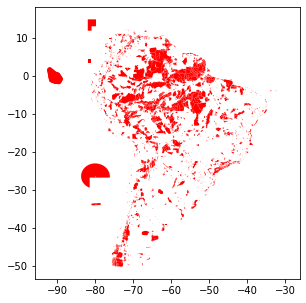

In [14]:
vegtype.plot( color='red',
            markersize=5, figsize=(5, 5) )

In [15]:
vegtype.size

51732

Still to many information-filtrate even more! Im going to extract only **BRA** and **vegtype "1"**

### Selecting Brazil 

In [16]:
BRA = vegtype[vegtype["ISO3"] == 'BRA']


In [17]:
BRA.tail(2)

,NAME,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA,area
5697,EstaÃ§Ã£o EcolÃ³gica Do Taim,BRA,0,0,0,0,"POLYGON ((-52.59803316678418 -32.7, -52.509705...",109.386075,0.008111
5698,Taim Ecological Station,BRA,0,0,0,0,"POLYGON ((-52.59803316614516 -32.7, -52.509705...",109.386000,0.008111


In [18]:
BRA2 = BRA[BRA["presntVG"] == "1"]
BRA3 = BRA[BRA["ENS45"] == "1"]
BRA4 = BRA[BRA["ENS85_1000"] == "1"]
BRA2.tail(2)


C:\Users\Visitante\Anaconda3\envs\geo_env\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,NAME,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA,area


In [19]:
BRA3.tail(2)

,NAME,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA,area
3283,Monumento Natural Municipal CapÃ£o Da Amizade,BRA,1,1,1,1,POLYGON ((-52.08111111099993 -31.0019444449999...,0.003278,3.086419e-07
3284,Parque Estadual Do Podocarpus,BRA,1,1,1,6,(POLYGON ((-52.74807207499993 -30.653814467999...,36.393639,3.428311e-03


In [20]:
BRA4.head(2)

,NAME,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA,area


Something is wrong with columns 'ENS85_1000',  'ENS85_420',  'presntVG'** ?               
Values in those columns are saved as integer and not as string! 

In [21]:
BRA2 = BRA[BRA["presntVG"] == 1]
BRA4 = BRA[BRA["ENS85_1000"] == 1]
BRA2.tail(2)

,NAME,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA,area
4796,Reserva Particular Do PatrimÃ´nio Natural Sant...,BRA,6,6,6,1,POLYGON ((-53.74915828199994 -23.1617072259999...,90.961000,0.000099
4797,Reserva BiolÃ³gica Das Perobas,BRA,6,6,6,1,POLYGON ((-52.83977532299991 -23.8584241609999...,87.161262,0.007725


In [22]:
BRA4.tail(2)

,NAME,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA,area
4781,EstaÃ§Ã£o EcolÃ³gica De Itapeva,BRA,6,1,6,1,POLYGON ((-49.06991791799993 -24.0767770359999...,0.992345,0.000088
4790,Tibagy/Mococa,BRA,6,1,6,1,POLYGON ((-50.7278177629999 -24.02505063899991...,8.599098,0.000747


### Plotting map 

Map of vegtype "1" - **rainforest** distribution for 3 scenarios

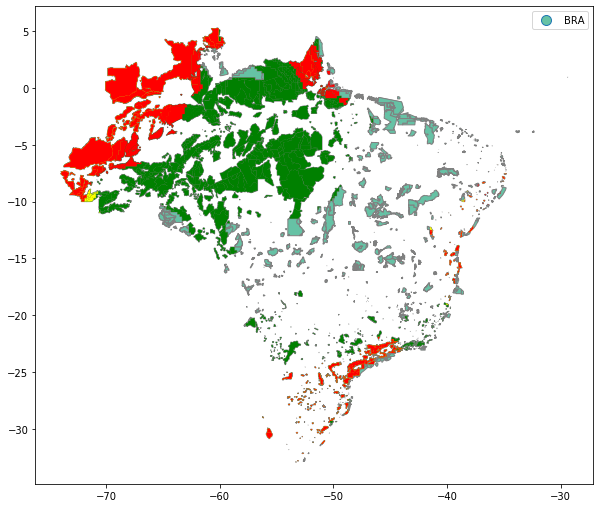

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
BRA.plot( ax=ax, cmap='Set2', column='ISO3', edgecolor='gray', legend=True)
BRA2.plot( ax=ax, color='green',markersize=5)
BRA3.plot( ax=ax, color='yellow',markersize=5)
BRA4.plot( ax=ax, color='red',markersize=5)

In case I need to save GeoDataFrame as Shapefile I'll use command 
                                        --> BRA.to_file("BRArainforest.shp")

### Data Analyses

In order to see **total area cover** by each vegtype projected in given scenario we are grouping data by columns of scenarios with option **.sum()**

In [34]:
pr=BRA.groupby('presntVG')[['area','REP_AREA']].sum() 
pr.head()

,area,REP_AREA
presntVG,,
0,7.130844,2.291788e+05
1,178.351734,5.294727e+06
6,28.433885,8.274401e+05
8,4.215974,1.168490e+05
13,9.841729,1.063359e+06


In [39]:
BRA.groupby('ENS45')[['area', 'REP_AREA']].sum()

,area,REP_AREA
ENS45,,
0,7.130844,2.291788e+05
1,50.942743,1.055729e+06
11,1.591072,2.323445e+05
13,43.075943,3.001062e+06
6,122.841152,2.813041e+06
8,2.392411,2.001989e+05


In [40]:
BRA.groupby('ENS85_1000')[['area', 'REP_AREA']].sum()

,area,REP_AREA
ENS85_1000,,
0,7.130844,2.291788e+05
1,66.581917,1.837731e+06
6,131.718816,3.837144e+06
8,0.602890,3.206857e+04
11,1.591072,2.323445e+05
13,20.348627,1.363087e+06


In [41]:
BRA.groupby('ENS85_420')[['area', 'REP_AREA']].sum()

,area,REP_AREA
ENS85_420,,
0,7.130844,2.291788e+05
1,6.329586,1.049550e+05
6,88.038878,2.922131e+06
8,56.557043,1.601353e+06
11,1.591072,2.323445e+05
13,68.326743,2.441592e+06


In order to see **total number of protected areas** for each vegtype projected in given scenario we are grouping data by scenario with option **.count()**

In [43]:
Pnum=BRA.groupby('presntVG').count()
Pnum.head()

,NAME,ISO3,ENS45,ENS85_1000,ENS85_420,geometry,REP_AREA,area
presntVG,,,,,,,,
0,259,259,259,259,259,259,259,259
1,1713,1713,1713,1713,1713,1713,1713,1713
6,572,572,572,572,572,572,572,572
8,128,128,128,128,128,128,128,128
13,161,161,161,161,161,161,161,161


In [44]:
ENS851000num=BRA.groupby('ENS85_1000').count()
ENS851000num.head()

,NAME,ISO3,ENS45,ENS85_420,presntVG,geometry,REP_AREA,area
ENS85_1000,,,,,,,,
0,259,259,259,259,259,259,259,259
1,745,745,745,745,745,745,745,745
6,1526,1526,1526,1526,1526,1526,1526,1526
8,6,6,6,6,6,6,6,6
11,87,87,87,87,87,87,87,87


In [45]:
ENS85_420num=BRA.groupby('ENS85_420').count()
ENS85_420num.head()

,NAME,ISO3,ENS45,ENS85_1000,presntVG,geometry,REP_AREA,area
ENS85_420,,,,,,,,
0,259,259,259,259,259,259,259,259
1,400,400,400,400,400,400,400,400
6,1296,1296,1296,1296,1296,1296,1296,1296
8,448,448,448,448,448,448,448,448
11,87,87,87,87,87,87,87,87


In [71]:
NAME=BRA.groupby('NAME').count()
len(NAME)


2122

In [59]:
NAME.loc[NAME['area']>= 5] 

,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA,area
NAME,,,,,,,,
Alto TuriaÃ§u,5,5,5,5,5,5,5,5
Central Amazon Conservation Complex,7,7,7,7,7,7,7,7
Deni,5,5,5,5,5,5,5,5
Discovery Coast Atlantic Forest Reserves,6,6,6,6,6,6,6,6
EstaÃ§Ã£o EcolÃ³gica De MaracÃ¡ Jipioca,5,5,5,5,5,5,5,5
EstaÃ§Ã£o EcolÃ³gica Do GrÃ£o ParÃ¡,5,5,5,5,5,5,5,5
EstaÃ§Ã£o EcolÃ³gica Do Jari,5,5,5,5,5,5,5,5
Floresta Estadual Do AmapÃ¡,5,5,5,5,5,5,5,5
Floresta Estadual Do Paru,5,5,5,5,5,5,5,5
